<a href="https://colab.research.google.com/github/NeoLin1103/Machine-learning-algorithms/blob/main/Monte_Carlo_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import expon

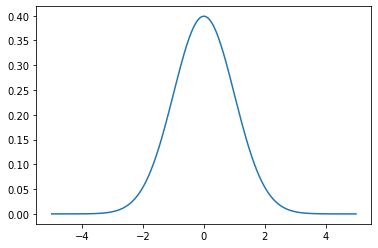

In [31]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-5, 5, 0.001)
# Mean = 0, SD = 1.
plt.plot(x_axis, norm.pdf(x_axis,0,1))
plt.show()

Rejection sampling

In [ ]:
"""
1. sample z ~ unif(-5,5)
2. Calculate p_x(z) , where x ~ norm(0,1)
3. sample y ~ unif(0,0.4)
4. if p(z) > y then append z
"""

'\n1. sample z from (-5,5) uniform distribution\n2. Calculate p(x) ~ norm\n3. sample y from (0,0.4) uniform distribution\n4. if p(x) > y then append z\n'

In [61]:
def norm_rejection_samp(rep):
  norm_samp = []
  for i in range(rep): 
    z = uniform.rvs(-5,10)
    p = norm.pdf(z,0,1)
    y = uniform.rvs(0,0.4)
    if p > y:
      norm_samp.append(z)
  return norm_samp

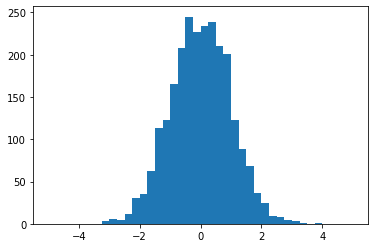

In [62]:
plt.hist(norm_rejection_samp(10000), range=[-5,5], bins=40)
plt.show()

In [47]:
norm_samp = []
norm_samp_rej = []
for i in range(10000): 
  z = uniform.rvs(-5,10)
  p = norm.pdf(z,0,1)
  y = uniform.rvs(0,0.4)
  if p > y:
    norm_samp.append((z,y))
  else:
    norm_samp_rej.append((z,y))

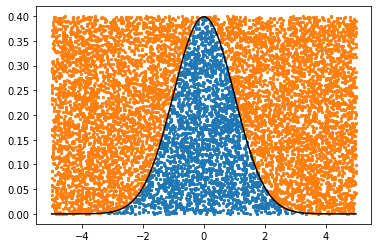

In [64]:
plt.scatter(np.array(norm_samp)[:,0], np.array(norm_samp)[:,1], s=5)
plt.scatter(np.array(norm_samp_rej)[:,0], np.array(norm_samp_rej)[:,1], s=5)
x_axis = np.arange(-5, 5, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,0,1), c="k")
plt.show()

Importance sampling

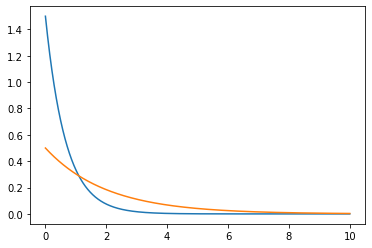

In [69]:
x_axis = np.arange(0, 10, 0.001)
plt.plot(x_axis, expon.pdf(x_axis, scale=1/1.5))
plt.plot(x_axis, expon.pdf(x_axis, scale=1/0.5))
plt.show()

In [88]:
def importance_sampling(rep, Lambda):
  samp = []
  for i in range(rep):
    p = uniform.rvs(0,10)  
    imp_rate = expon.pdf(p, scale=1/Lambda)/(1/10)
    samp.append(p*imp_rate)
  print(f"The expected value of X ~ exp ({Lambda}) is {1/Lambda}, where the estimation by importance sampling is {sum(samp)/rep}.")
  return sum(samp)/rep

In [91]:
importance_sampling(100000,1.7)

The expected value of X ~ exp (1.7) is 0.5882352941176471, where the estimation by importance sampling is 0.5897992306434824.


0.5897992306434824